In [1]:
!pip install pandas
!pip install seaborn
!pip install missingno
import pandas as pd

In [2]:
df = pd.read_csv('development_sample.csv')

In [3]:
df.head()

,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,...,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,1,0,6768.42,0.00,0,0,0,3899
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,0,15000,5937.66,3870.60,0,0,0,3899
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,2,0,5647.77,1463.08,0,0,10,3899
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,0,3594.90,21563.78,0,0,10,3899
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,0,2,2,0,9908.45,0.00,0,0,20,3899


In [4]:
df.drop(['ID', 'customer_id'], axis=1, inplace=True)


In [5]:
#filtering out only approved applications and where we have target values
df = df[df['Application_status'] == 'Approved']
df = df[df['target'].notnull()]


In [6]:
# Display unique values per column
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 40)


application_date:
['01Feb2010 0:00:00' '02Feb2010 0:00:00' '03Feb2010 0:00:00' ...
 '29Dec2020 0:00:00' '30Dec2020 0:00:00' '31Dec2020 0:00:00']
----------------------------------------
target:
[0. 1.]
----------------------------------------
Application_status:
['Approved']
----------------------------------------
Var1:
[1 2 3 4]
----------------------------------------
Var2:
[ 2.  1.  3. nan]
----------------------------------------
Var3:
['1' '2' nan 'Direct' '3' 'Online']
----------------------------------------
Var4:
[ 7800 11100  2400 11800  7200 15300  7900  9400 11400 10400 12900 10600
  3500  3200 12200  3300  3100 10700 14600 11700 12400  8400 15700  7000
 10800  8000 10900 10200 11200  2100  8900  5900  7700  8700 14500 14100
  9600 15200  4000  4500  9200 16000 10100  3000 12300 13600  2200 13300
  3600 14700 11600  3400  2000 11900 15000  3700  3800 10300  2900 12700
  6900  7300  8200 16600 12100 12800  9000 13200 16200 13700 13100  9800
  7400 16300  8800  1700 14000 170

In [7]:
import numpy as np

# Mapping for Var2
# Original: [ 2.  1.  3. nan]
# Mapping: 1 -> 'Car Loan', 2 -> 'House Renovation', 3 -> 'Short Cash'
var2_mapping = {
    1.0: 'Car Loan',
    2.0: 'House Renovation',
    3.0: 'Short Cash',
    np.nan: np.nan 
}

# Mapping for Var3
# Original: ['1' '2' nan 'Direct' '3' 'Online']
# Mapping: 1 -> 'Direct', 2 -> 'Broker', 3 -> 'Online'
# Handle existing strings and potential string/number codes
var3_mapping = {
    '1': 'Direct',
    1: 'Direct',   # Include integer mapping if applicable
    1.0: 'Direct', # Include float mapping if applicable
    'Direct': 'Direct', # Map existing correct values to themselves

    '2': 'Broker',
    2: 'Broker',
    2.0: 'Broker',
    'Broker': 'Broker',

    '3': 'Online',
    3: 'Online',
    3.0: 'Online',
    'Online': 'Online',

    np.nan: np.nan 
}

# Mapping for Var6
# Original: [1 6 3]
# Mapping: 1 -> 'monthly', 3 -> 'quarterly', 6 -> 'bi-yearly'
var6_mapping = {
    1: 'monthly',
    3: 'quarterly',
    6: 'bi-yearly'
}

# Mapping for Var11
# Original: [5 2 6 4 3 1 7]
# Mapping: 1->Pensioneer, 2->Government, 3->Military, 4->Self Employed, 5->Employee, 6->Business Owner, 7->Unemployed
var11_mapping = {
    1: 'Pensioneer',
    2: 'Government',
    3: 'Military',
    4: 'Self Employed',
    5: 'Employee',
    6: 'Business Owner',
    7: 'Unemployed'
}

# Mapping for Var12
# Original: [nan  5.  2.  4.  6.  3.  1.  7.]
# Mapping: 1->Pensioneer, 2->Government, 3->Military, 4->Self Employed, 5->Employee, 6->Business Owner, 7->Unemployed
var12_mapping = {
    1.0: 'Pensioneer',
    2.0: 'Government',
    3.0: 'Military',
    4.0: 'Self Employed',
    5.0: 'Employee',
    6.0: 'Business Owner',
    7.0: 'Unemployed',
    np.nan: np.nan # Keep NaN as is
}

# Mapping for Var14
# Original: [2 4 1 0 3]
# Mapping: 0->Single, 1->Married, 2->Informal relationship, 3->Divorced, 4->Widowed
var14_mapping = {
    0: 'Single',
    1: 'Married',
    2: 'Informal relationship',
    3: 'Divorced',
    4: 'Widowed'
}

# Print the mappings to verify
print("Var2 Mapping:", var2_mapping)
print("\nVar3 Mapping:", var3_mapping)
print("\nVar6 Mapping:", var6_mapping)
print("\nVar11 Mapping:", var11_mapping)
print("\nVar12 Mapping:", var12_mapping)
print("\nVar14 Mapping:", var14_mapping)

Var2 Mapping: {1.0: 'Car Loan', 2.0: 'House Renovation', 3.0: 'Short Cash', nan: nan}

Var3 Mapping: {'1': 'Direct', 1: 'Direct', 'Direct': 'Direct', '2': 'Broker', 2: 'Broker', 'Broker': 'Broker', '3': 'Online', 3: 'Online', 'Online': 'Online', nan: nan}

Var6 Mapping: {1: 'monthly', 3: 'quarterly', 6: 'bi-yearly'}

Var11 Mapping: {1: 'Pensioneer', 2: 'Government', 3: 'Military', 4: 'Self Employed', 5: 'Employee', 6: 'Business Owner', 7: 'Unemployed'}

Var12 Mapping: {1.0: 'Pensioneer', 2.0: 'Government', 3.0: 'Military', 4.0: 'Self Employed', 5.0: 'Employee', 6.0: 'Business Owner', 7.0: 'Unemployed', nan: nan}

Var14 Mapping: {0: 'Single', 1: 'Married', 2: 'Informal relationship', 3: 'Divorced', 4: 'Widowed'}


In [8]:
if 'Var2' in df.columns:
    df['Var2'] = df['Var2'].map(var2_mapping) 

if 'Var3' in df.columns:

    df['Var3'] = df['Var3'].astype(str).map(var3_mapping) 

if 'Var6' in df.columns:
    df['Var6'] = df['Var6'].map(var6_mapping)

if 'Var11' in df.columns:
    df['Var11'] = df['Var11'].map(var11_mapping)

if 'Var12' in df.columns:
    df['Var12'] = df['Var12'].map(var12_mapping)

if 'Var14' in df.columns:
    df['Var14'] = df['Var14'].map(var14_mapping)


In [9]:
df['application_date'] = pd.to_datetime(df['application_date']).dt.normalize()


In [10]:
df['Var13'] = pd.to_datetime(df['Var13'], format='%d%b%Y', errors='coerce')


In [11]:
df['employment_duration_days'] = (df['application_date'] - df['Var13']).dt.days
df['employment_duration_years'] = df['employment_duration_days'] / 365.25


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36718 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   application_date           36718 non-null  datetime64[ns]
 1   target                     36718 non-null  float64       
 2   Application_status         36718 non-null  object        
 3   Var1                       36718 non-null  int64         
 4   Var2                       35700 non-null  object        
 5   Var3                       35700 non-null  object        
 6   Var4                       36718 non-null  int64         
 7   Var5                       36718 non-null  int64         
 8   Var6                       36718 non-null  object        
 9   Var7                       36718 non-null  float64       
 10  Var8                       16180 non-null  float64       
 11  Var9                       36718 non-null  int64         
 12  Var10    

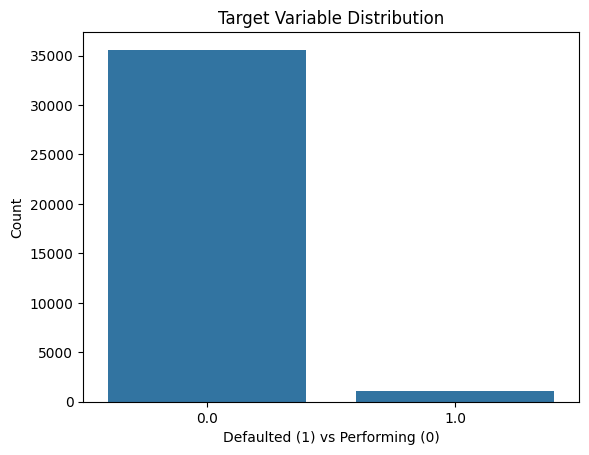

target
0.0    0.969307
1.0    0.030693
Name: proportion, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Defaulted (1) vs Performing (0)')
plt.ylabel('Count')
plt.show()

print(df['target'].value_counts(normalize=True))


<Axes: >

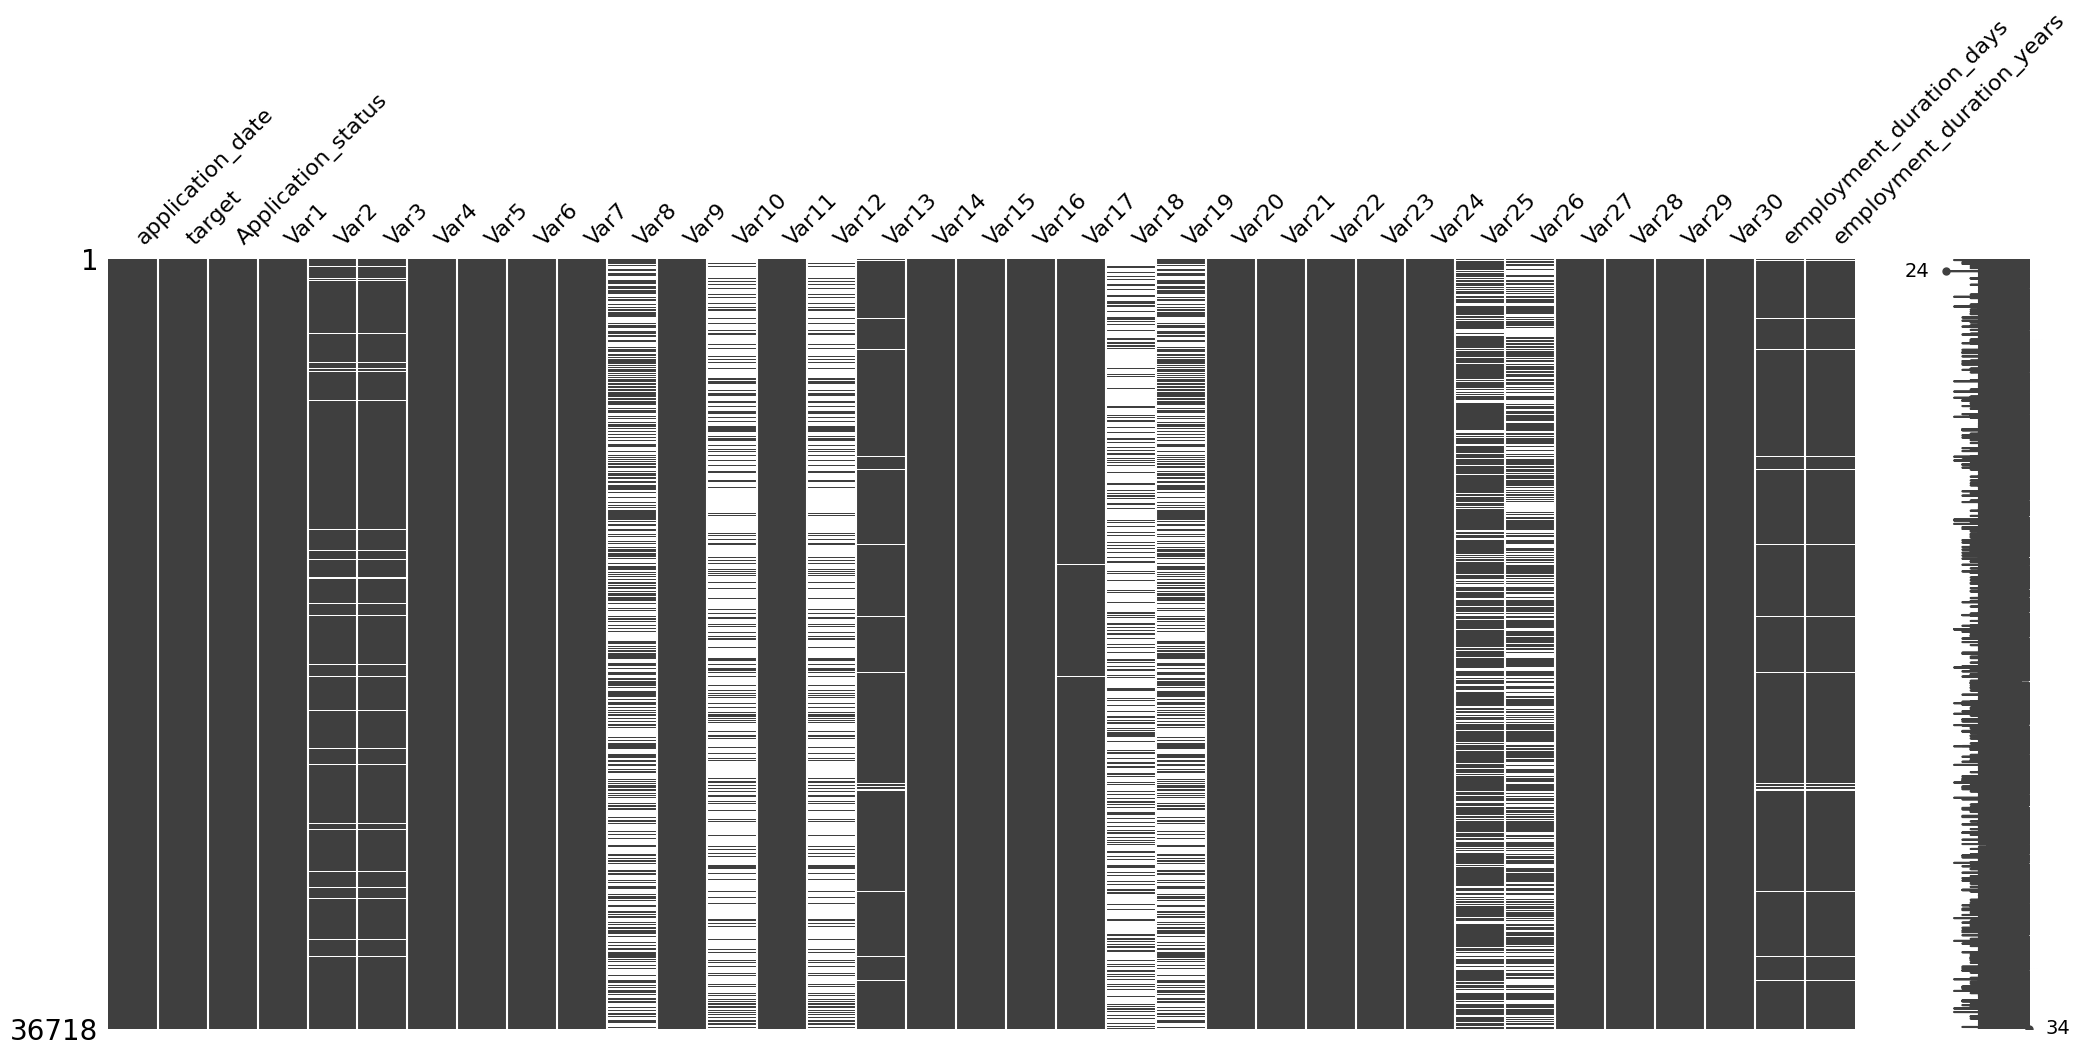

In [14]:
import missingno as msno
msno.matrix(df)


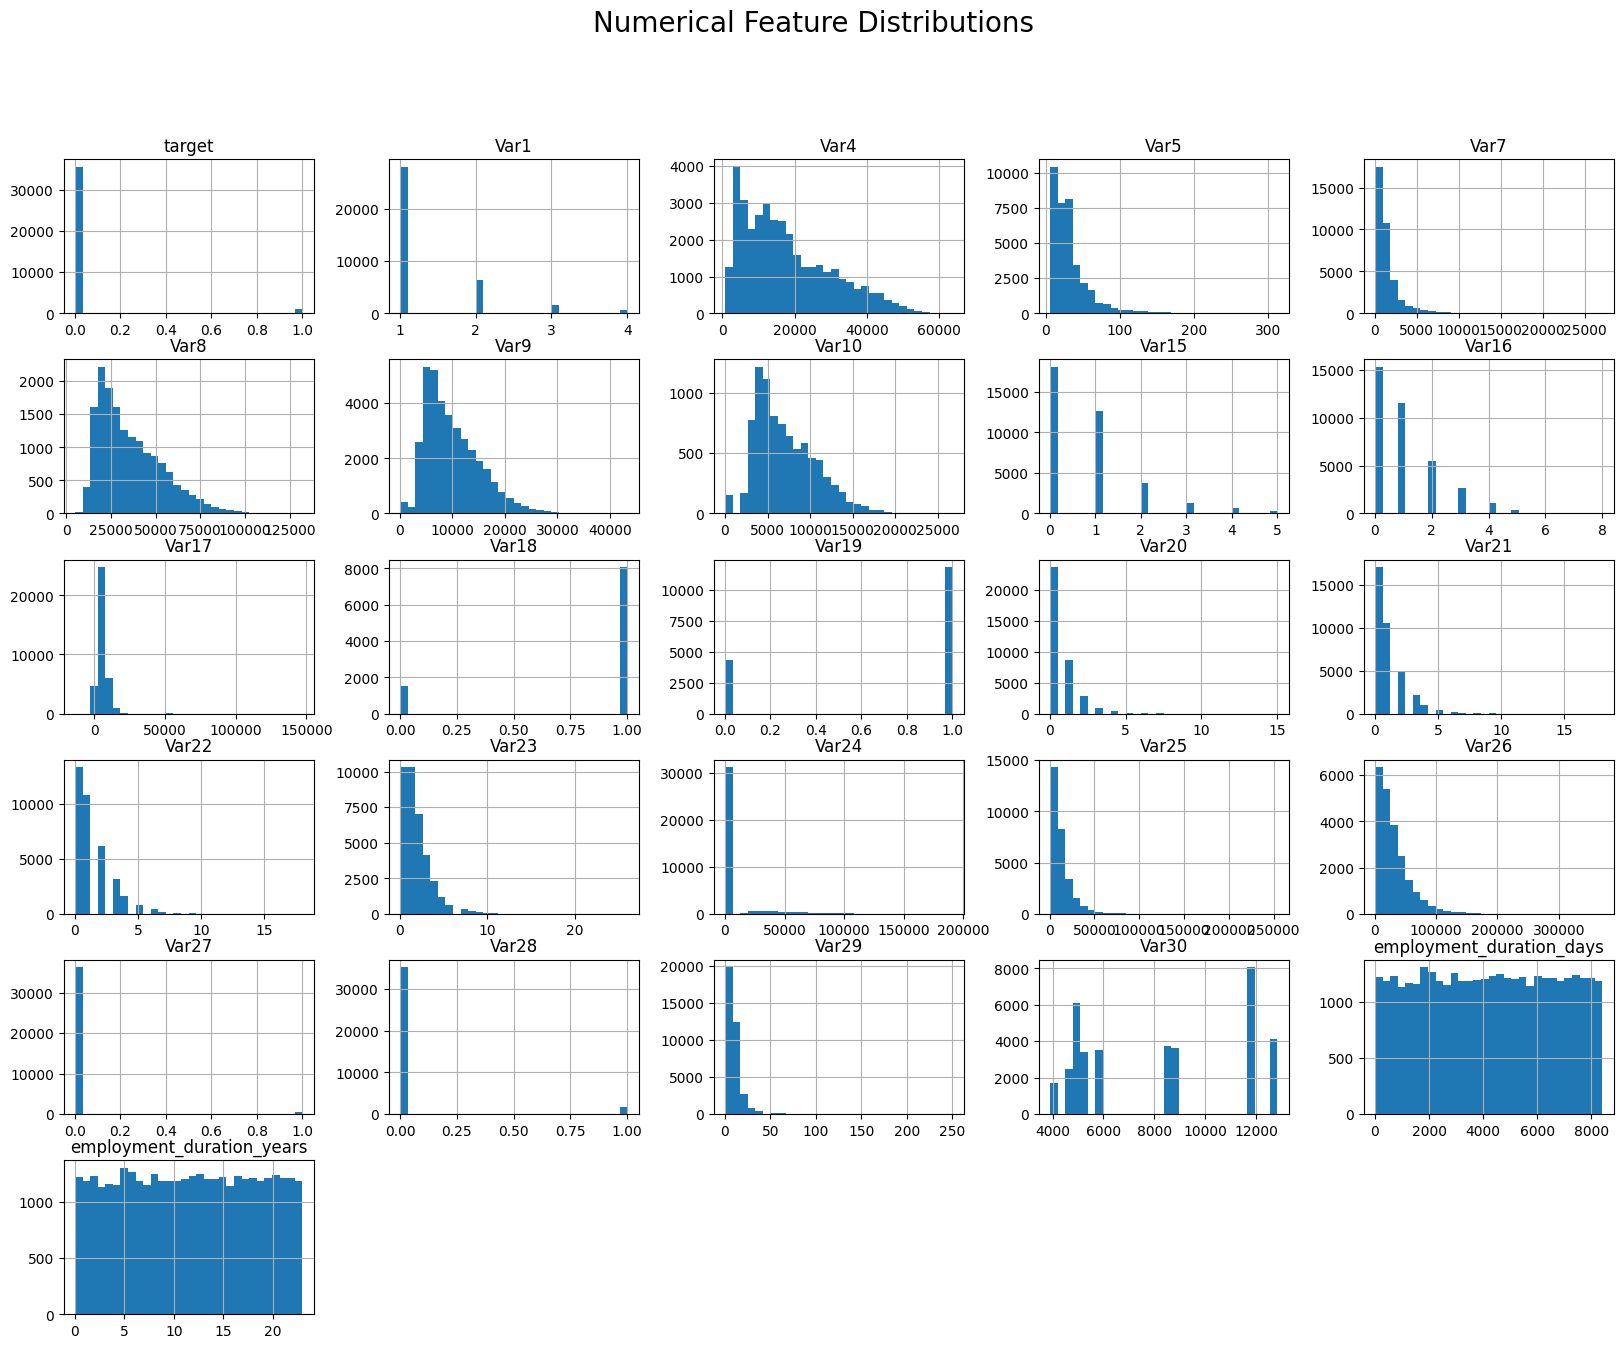

In [15]:
df.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(20, 15))
plt.suptitle('Numerical Feature Distributions', fontsize=20)
plt.show()


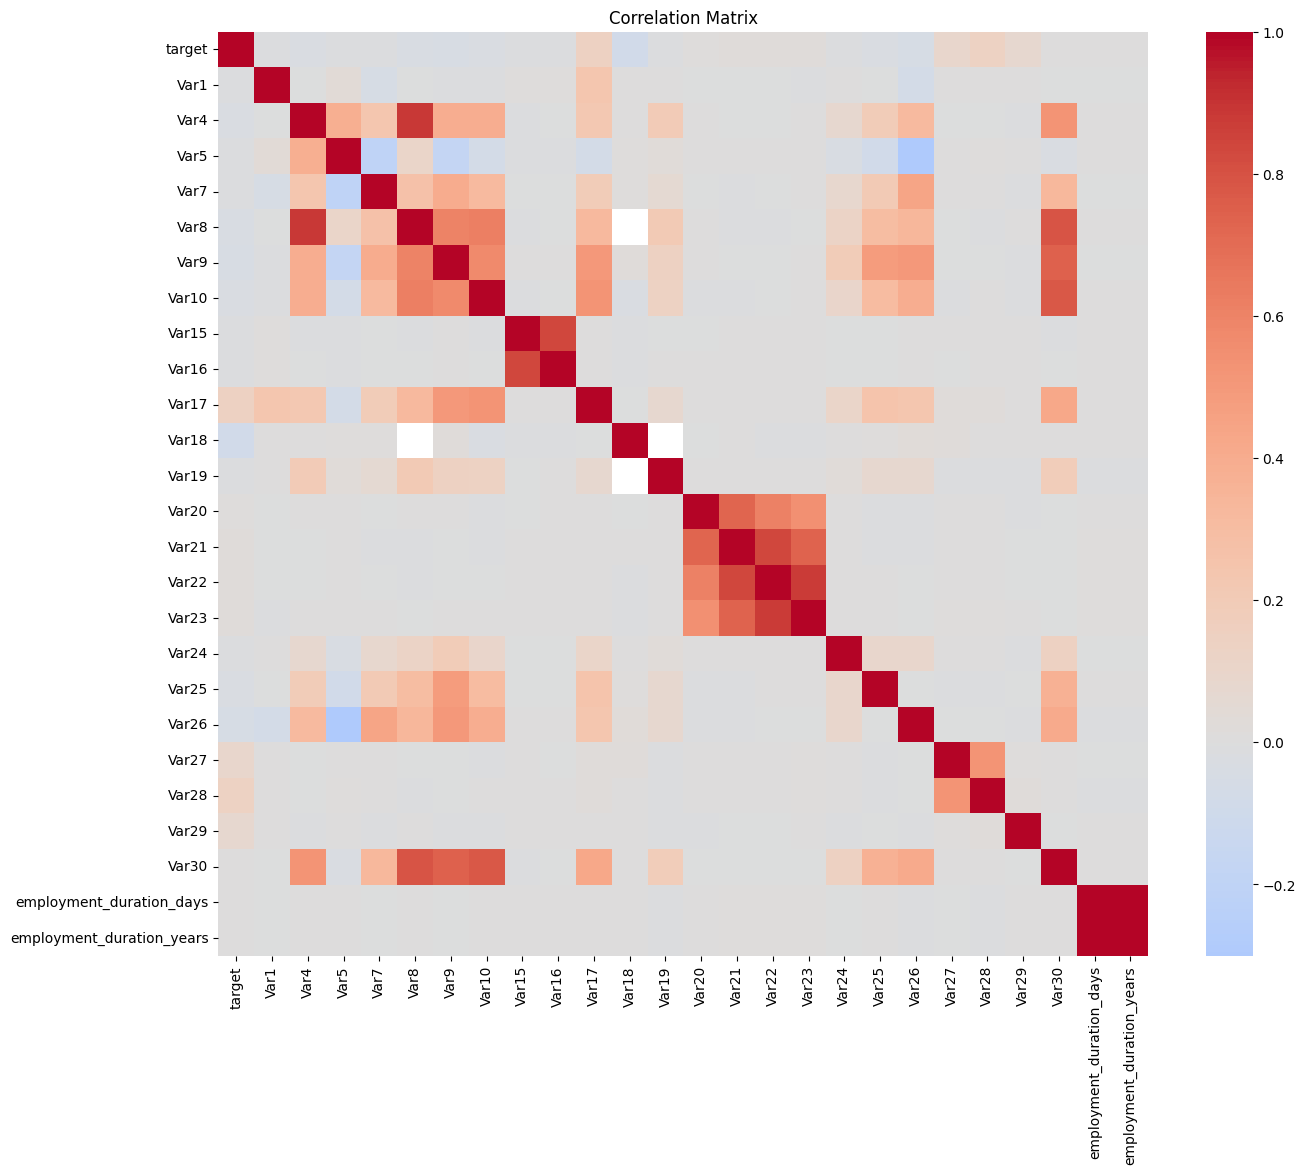

In [16]:
import numpy as np

corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [17]:
cat_vars = df.select_dtypes(include='object').columns.to_list()


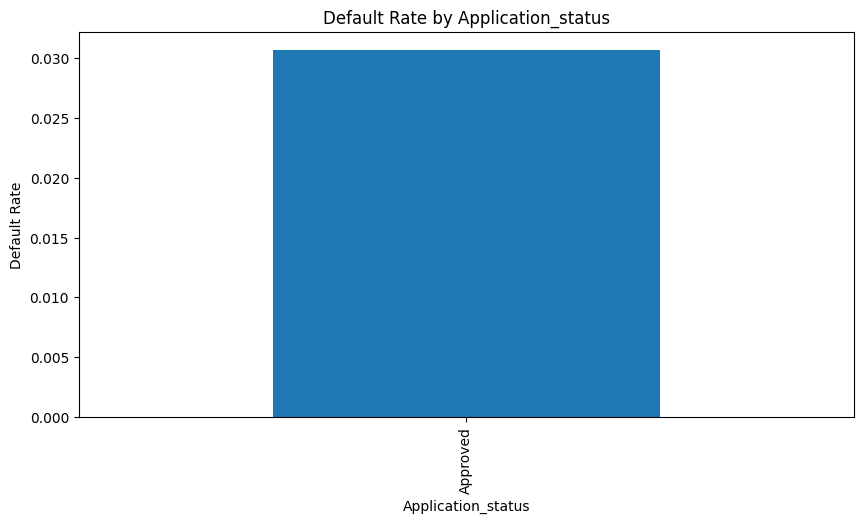

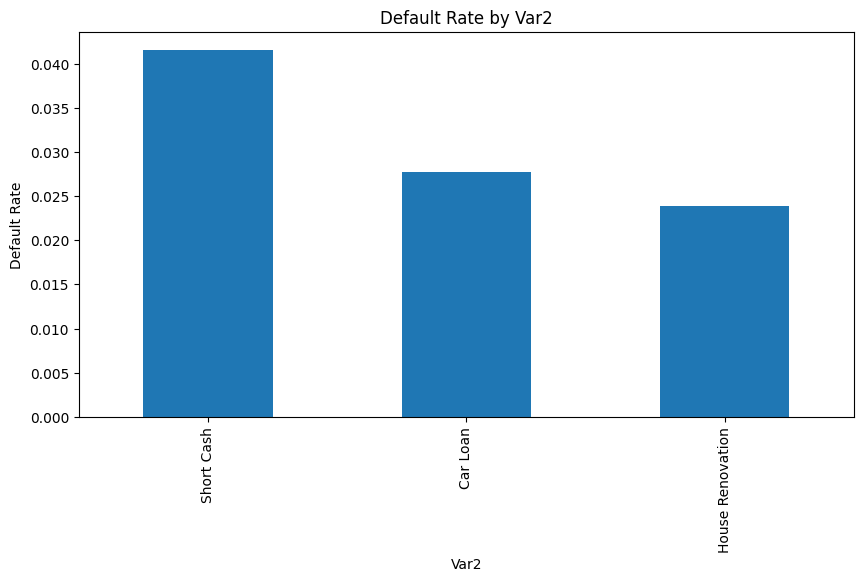

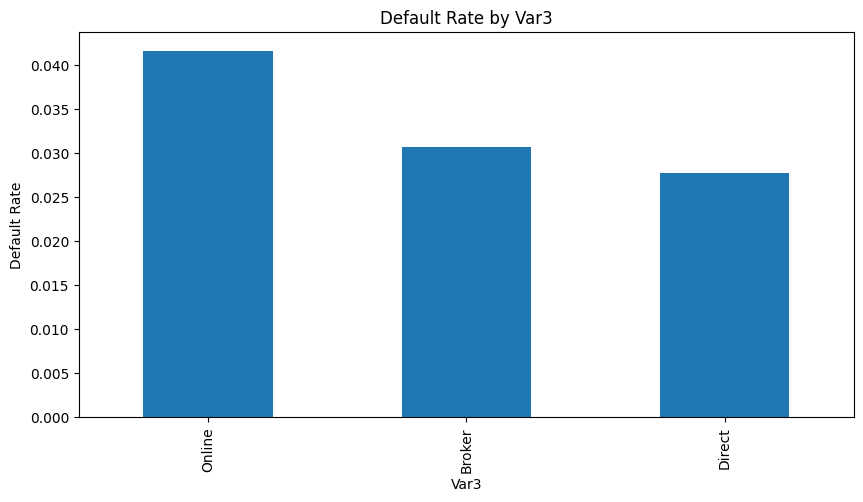

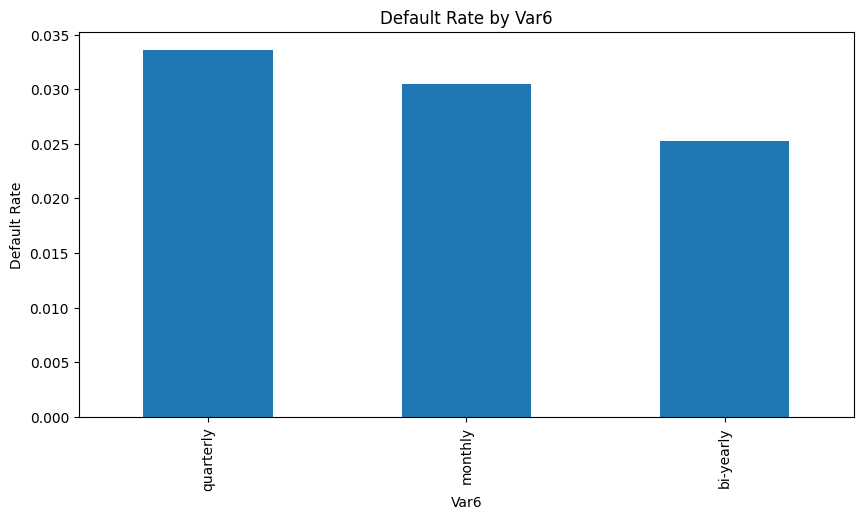

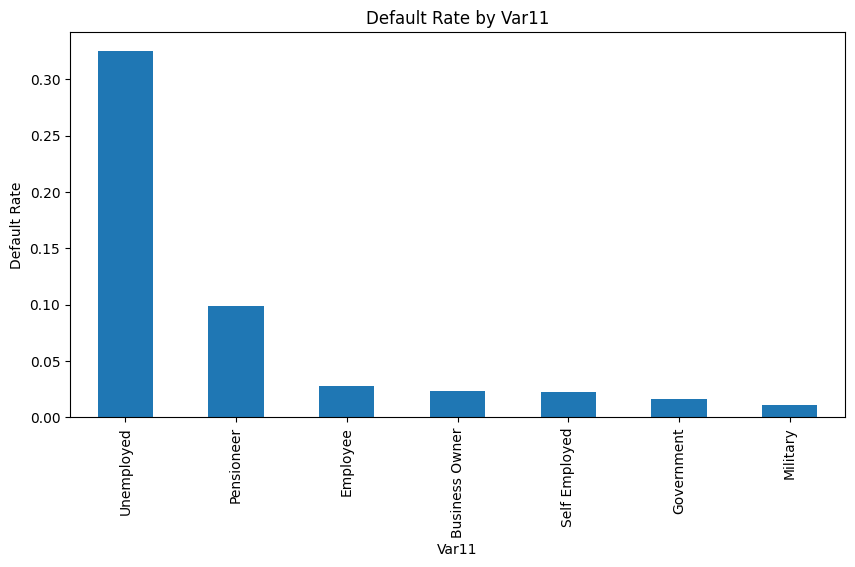

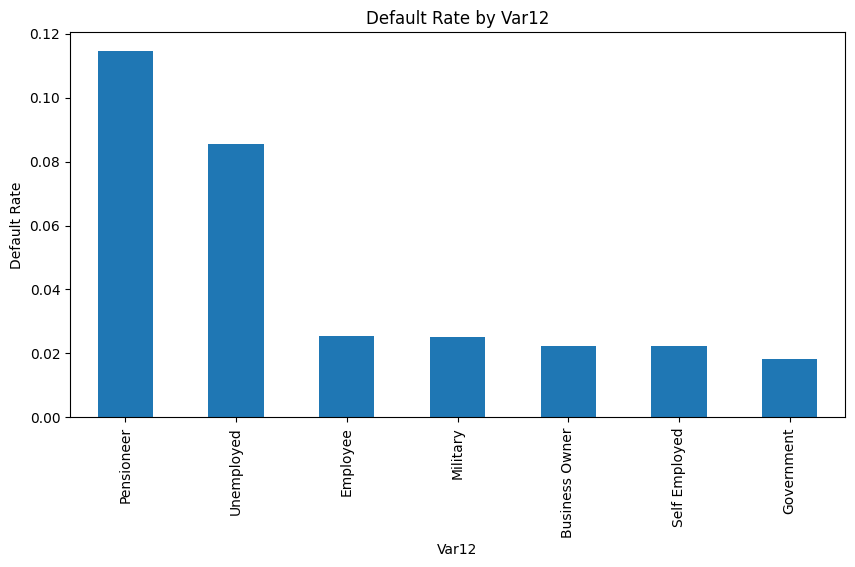

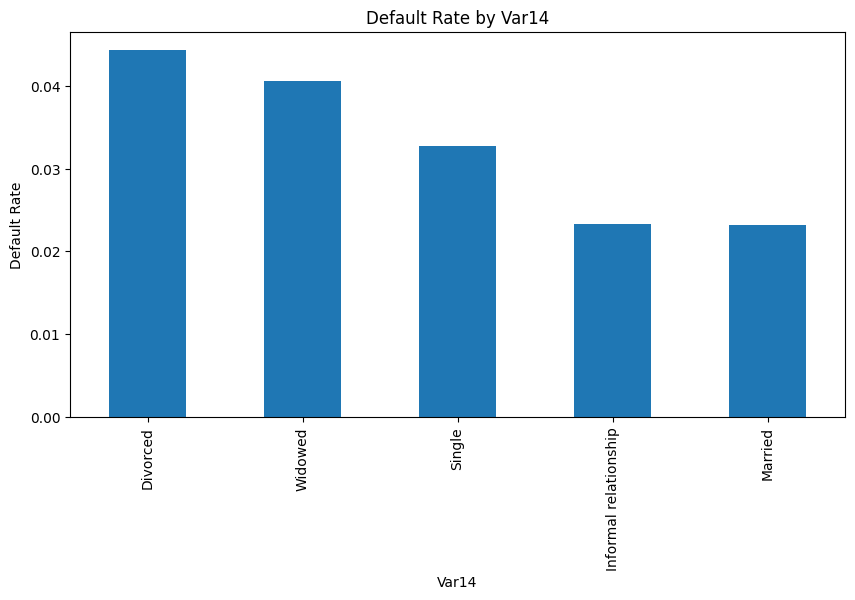

In [18]:
def plot_default_rate_by_category(feature):
    default_rate = df[df['target'].notnull()].groupby(feature)['target'].mean().sort_values(ascending=False)
    default_rate.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Default Rate by {feature}')
    plt.ylabel('Default Rate')
    plt.xlabel(feature)
    plt.show()

for i in cat_vars:
    plot_default_rate_by_category(i)


In [19]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0.0])  


Var12                        0.763740
Var10                        0.763740
Var18                        0.738738
Var19                        0.559344
Var8                         0.559344
Var26                        0.398960
Var25                        0.201563
Var3                         0.027725
Var2                         0.027725
Var13                        0.015360
employment_duration_days     0.015360
employment_duration_years    0.015360
Var17                        0.000872
dtype: float64


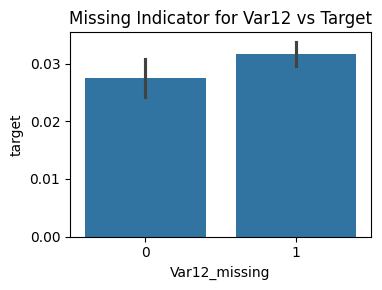

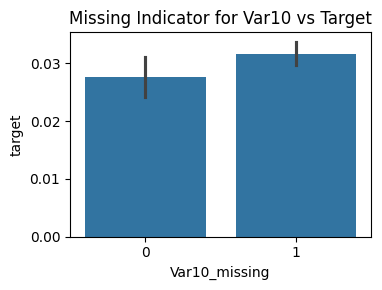

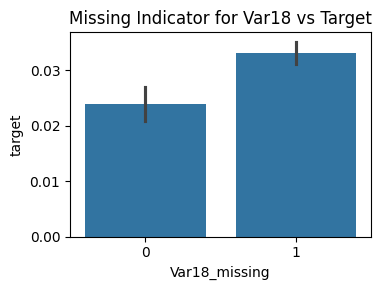

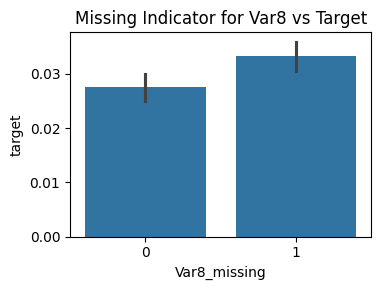

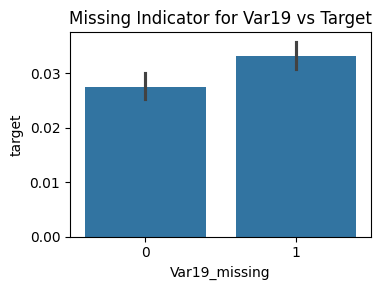

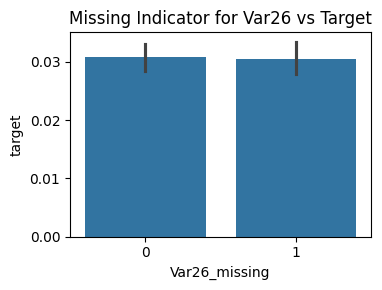

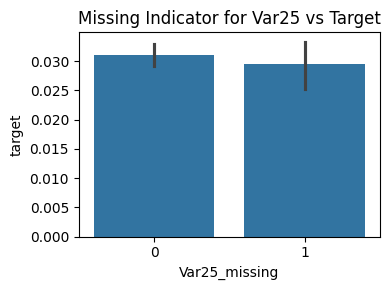

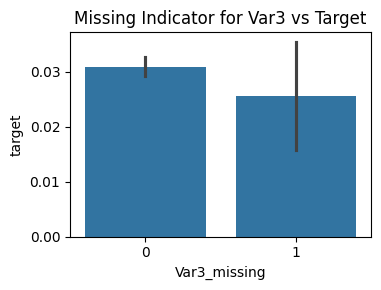

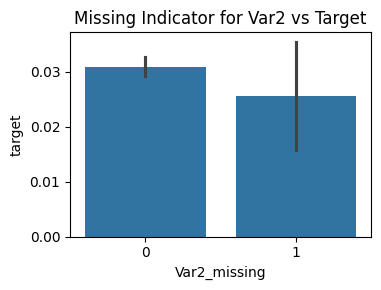

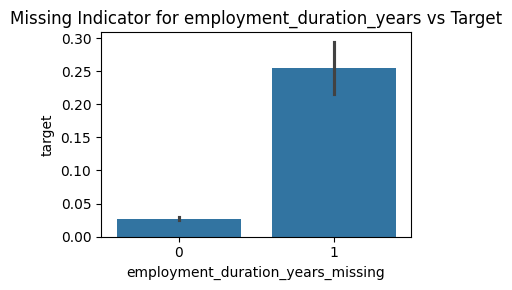

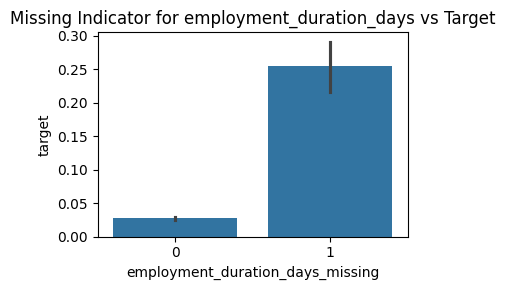

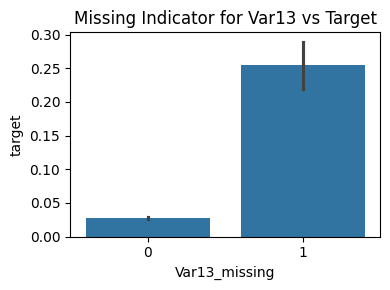

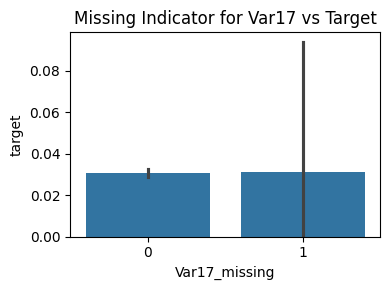

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_to_check = ['Var12', 'Var10', 'Var18', 'Var8', 'Var19', 'Var26','Var25','Var3','Var2','employment_duration_years','employment_duration_days','Var13','Var17']

for var in vars_to_check:
    missing_col = f"{var}_missing"
    df[missing_col] = df[var].isnull().astype(int)

    plt.figure(figsize=(4, 3))
    sns.barplot(x=missing_col, y='target', data=df)
    plt.title(f"Missing Indicator for {var} vs Target")
    plt.tight_layout()
    plt.show()


In [21]:
#what to do with NAs
#VAR10 - Application data: income of second applicant - NA can mean there is no second applicant
#VAR12  - Application data: profession of second applicant - NA can mean there is no second applicant
#var 18 - Property ownership for property renovation - NA can mean no property owned
#var 8 = Value of the goods (car) - maybe no goods/car owned by applicant
#Var 19 - Clasification of the vehicle (Car, Motorbike) maybe NA means no car owned
#Var 26 - Amount on savings account - maybe no savings on applicant account
#Var 25 - Amount on current account - maybe no money on current account
#Var3 - Distribution Channel - no explanation - lets drop this also very few observations
#Var2 - Loan Purpose - no explanation - maybe it can be dropped - few observations
#employment duration calculated by the use of application date, these and Var13 (application date) they all missing at the same places
#Vae13 see row above
#Var17 Spending estimation can be dropped - incredibly low

In [22]:
##handling missing values

In [23]:
df['Var10'].min()

np.float64(0.0)

In [24]:
# Create missing indicator before filling
df['Var10_missing'] = df['Var10'].isnull().astype(int)

# Fill missing with 0 (no second applicant = no extra income)
df['Var10'] = df['Var10'].fillna(0)


In [25]:
df['Var12_missing'].unique()

array([1, 0])

In [26]:
df['Var12_missing'] = df['Var12'].isnull().astype(int)
df['Var12'] = df['Var12'].fillna('No_Second_Applicant')


In [27]:
df['Var18'].unique()

array([ 1., nan,  0.])

In [28]:
df['Var18_missing'] = df['Var18'].isnull().astype(int)

# Impute missing as 0 (not owning property for renovation)
df['Var18'] = df['Var18'].fillna(0)

In [29]:
df['Var8'].unique()

array([    nan,  11200.,  12400.,  23000.,   9900.,  11400.,  12000.,
        14200.,  12100.,  20100.,  18500.,  13000.,  15900.,  16000.,
        21500.,  19200.,  15700.,  18400.,  12700.,  17500.,  14900.,
        17100.,  18200.,  16800.,  10700.,  27000.,  19100.,  14800.,
         9300.,  18000.,  13700.,  16500.,  18600.,  17200.,  19300.,
        16400.,  18700.,  14100.,  21800.,   9700.,  16600.,  22200.,
        13400.,  17300.,  10400.,  19700.,  20600.,  16200.,  25400.,
        14700.,  14300.,  12200.,  28800.,  19400.,  15100.,  17000.,
        29500.,  15600.,  20800.,  21000.,  27500.,  31000.,  12800.,
        23800.,  21200.,  29300.,  11700.,   9600.,  22500.,  13600.,
        18800.,  21700.,  14600.,  18900.,  22700.,  16900.,  11300.,
        24100.,  20500.,  15800.,  11600.,  10900.,  19500.,  15300.,
        24200.,  16300.,  11500.,  22900.,  13200.,  31600.,  11000.,
        29000.,  12500.,  24400.,  17900.,  17700.,  27400.,  17400.,
        12300.,  286

In [30]:
df['Var8_missing'] = df['Var8'].isna().astype(int)
df['Var8'] = df['Var8'].fillna(0)


In [31]:
df['Var19'].unique()

array([nan,  1.,  0.])

In [32]:
##in case of not satisfactory results this could be further investigated
pd.crosstab(df['Var19_missing'],  df['Var11'])

Var11,Business Owner,Employee,Government,Military,Pensioneer,Self Employed,Unemployed
Var19_missing,,,,,,,
0,1501,11226,467,497,373,1941,175
1,1744,14435,592,640,468,2404,255


In [33]:
df['Var19_missing'] = df['Var19'].isna().astype(int)
df['Var19'] = df['Var19'].fillna(0)


In [34]:
df['Var26'].unique()

array([0.0000000e+00, 3.8706000e+03, 1.4630800e+03, ..., 1.7292000e+02,
       1.0800534e+05, 2.5501831e+05], shape=(20451,))

In [35]:
df['Var26'].min()

np.float64(0.0)

In [36]:
#in case of Var26, nan can mean the person does not have a saving account at all

In [37]:
df['Var26_missing'] = df['Var26'].isna().astype(int)
df['Var26'] = df['Var26'].fillna(0)


In [38]:
df['Var25'].unique()

array([ 6768.42,  5937.66,  5647.77, ..., 18255.34, 10816.79,  9288.87],
      shape=(29102,))

In [39]:
df['Var25'].min()

np.float64(260.36)

In [40]:
#Var 25 - maybe the applicant applied for the loan at a new bank and they also needed to set up an account - therefore it shows nan (they did not have account at the time)

In [41]:
df['Var25_missing'] = df['Var25'].isna().astype(int)
df['Var25'] = df['Var25'].fillna(0)


In [42]:
pd.crosstab(df['Var25_missing'],  df['Var2'])

Var2,Car Loan,House Renovation,Short Cash
Var25_missing,,,
0,12638,7441,8449
1,3106,1874,2192


In [43]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0.0])  


Var2                         0.027725
Var3                         0.027725
employment_duration_days     0.015360
employment_duration_years    0.015360
Var13                        0.015360
Var17                        0.000872
dtype: float64


In [44]:
cols_to_drop = [
    'Var2',
    'Var3',
    'employment_duration_days',
    'employment_duration_years',
    'Var13',
    'Var17'
]

df = df.drop(columns=cols_to_drop)


In [45]:
missing_percent = df.isnull().mean().sort_values(ascending=False)
print(missing_percent)  


application_date                     0.0
Var18_missing                        0.0
Var25                                0.0
Var26                                0.0
Var27                                0.0
Var28                                0.0
Var29                                0.0
Var30                                0.0
Var12_missing                        0.0
Var10_missing                        0.0
Var8_missing                         0.0
target                               0.0
Var19_missing                        0.0
Var26_missing                        0.0
Var25_missing                        0.0
Var3_missing                         0.0
Var2_missing                         0.0
employment_duration_years_missing    0.0
employment_duration_days_missing     0.0
Var13_missing                        0.0
Var24                                0.0
Var23                                0.0
Var22                                0.0
Var21                                0.0
Application_stat

In [46]:
df.to_csv('raw_mapped_no_na.csv')

In [47]:
df.head()

,application_date,target,Application_status,Var1,Var4,Var5,Var6,Var7,Var8,Var9,...,Var8_missing,Var19_missing,Var26_missing,Var25_missing,Var3_missing,Var2_missing,employment_duration_years_missing,employment_duration_days_missing,Var13_missing,Var17_missing
0,2010-02-01,0.0,Approved,1,7800,99,monthly,108.73,0.0,5640,...,1,1,0,0,0,0,0,0,0,0
1,2010-02-01,0.0,Approved,1,11100,78,monthly,195.99,11200.0,3000,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-01,0.0,Approved,2,2400,15,monthly,248.34,0.0,6240,...,1,1,0,0,0,0,0,0,0,0
3,2010-02-01,0.0,Approved,3,11800,30,bi-yearly,3538.68,12400.0,4560,...,0,0,0,0,0,0,0,0,0,0
5,2010-02-02,0.0,Approved,1,7200,36,monthly,267.19,0.0,3960,...,1,1,1,0,0,0,1,1,1,0


In [48]:
# Drop unnecessary columns
df = df.drop(columns=[ 'application_date', 'Application_status'])

In [49]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [50]:
# One-hot encode categorical variables 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [51]:
# Separate features (X) and target (y)
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

In [52]:
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True)}")
print(f"First few feature columns: {X.columns[:10].tolist()}")

Features shape: (36718, 54)
Target distribution:
target
0.0    0.969307
1.0    0.030693
Name: proportion, dtype: float64
First few feature columns: ['Var1', 'Var4', 'Var5', 'Var7', 'Var8', 'Var9', 'Var10', 'Var15', 'Var16', 'Var18']


In [53]:
df_encoded.to_csv('modeling_ready_dataset.csv', index=False)

In [77]:
# libraries used
%pip install scikit-learn
%pip install xgboost
%pip install imblearn
%pip install lightgbm
%pip install catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import lightgbm as lgb
from catboost import CatBoostClassifier


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 61.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 68.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [catboost]3/4 [catboost]
Note: you may need to restart the kernel to use updated packages.


In [55]:
df_encoded = pd.read_csv('modeling_ready_dataset.csv')

In [56]:
# Split features and target
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [58]:
# Logistic Regression baseline
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))


Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      7119
         1.0       0.06      0.62      0.12       225

    accuracy                           0.71      7344
   macro avg       0.52      0.67      0.47      7344
weighted avg       0.96      0.71      0.81      7344

ROC AUC: 0.7208028593279332


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Random Forest baseline
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      7119
         1.0       0.40      0.01      0.02       225

    accuracy                           0.97      7344
   macro avg       0.68      0.50      0.50      7344
weighted avg       0.95      0.97      0.95      7344

ROC AUC: 0.7067631221613523


In [60]:
# XGBoost baseline
xgb = XGBClassifier(scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train), use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:47:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      7119
         1.0       0.10      0.20      0.13       225

    accuracy                           0.92      7344
   macro avg       0.54      0.57      0.55      7344
weighted avg       0.95      0.92      0.93      7344

ROC AUC: 0.69228262396404


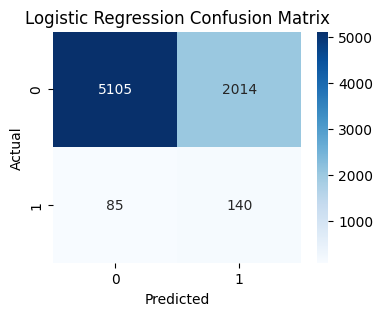

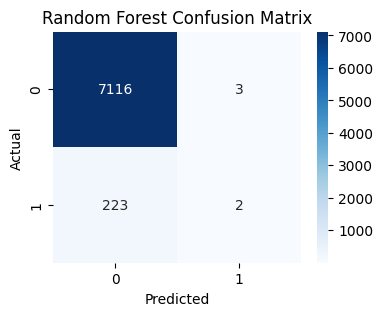

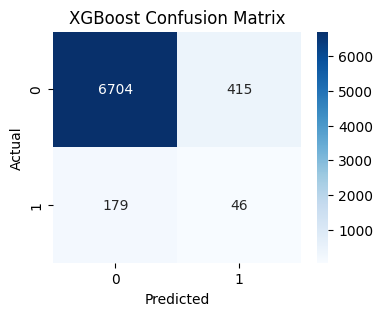

In [61]:
# Confusion matrices (optional)
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, y_pred in zip(['Logistic Regression', 'Random Forest', 'XGBoost'],
                              [y_pred_logreg, y_pred_rf, y_pred_xgb]):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

cross-validation + hyperparameter tuning(trying to imrove the performance)

In [63]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [(len(y)-sum(y))/sum(y)]  # to handle imbalance
}

In [64]:
# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [65]:
# Randomized search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [66]:
# Run search
random_search.fit(X, y)
print("Best parameters:", random_search.best_params_)
print("Best ROC AUC:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.7s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.9s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.7s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.3s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.4s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.5s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   6.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   6.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   6.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   6.8s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   6.9s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   7.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   6.9s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   7.7s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   4.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   4.6s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   4.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   5.3s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   8.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.4s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   8.7s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.0s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.9s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.3s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:48:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   3.2s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   5.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   5.8s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   6.2s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   6.5s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.8s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.5s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.7s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.8s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.3s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.8s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.1s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.8; total time=  10.5s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.8; total time=  10.8s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.8; total time=  11.0s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   2.7s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.9s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=10, n_estimators=300, scale_pos_weight=31.580301685891747, subsample=0.8; total time=  12.6s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   4.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   4.1s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.9s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   6.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   6.7s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   6.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   6.1s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=1.0; total time=   6.3s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   6.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.4s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboo

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   1.6s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.2s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   2.5s


/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.6; total time=   3.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=31.580301685891747, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, 

/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:49:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'subsample': 0.6, 'scale_pos_weight': 31.580301685891747, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best ROC AUC: 0.7499061618514151


In [68]:
# Predict probabilities on the test set
y_scores = random_search.best_estimator_.predict_proba(X_test)[:, 1]

In [69]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

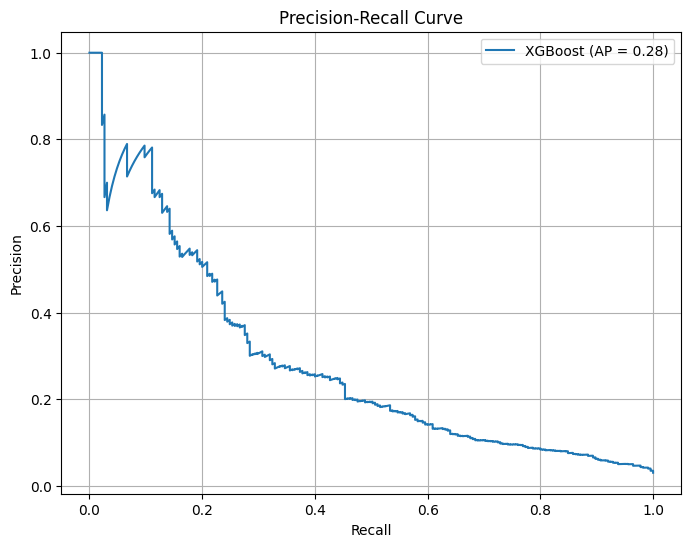

In [70]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'XGBoost (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [72]:
import numpy as np

print("\nThreshold tuning results:")
for thresh in np.arange(0.1, 0.9, 0.1):
    preds = (y_scores >= thresh).astype(int)
    report = classification_report(y_test, preds, output_dict=True)
    
    if '1' in report:
        precision_1 = report['1']['precision']
        recall_1 = report['1']['recall']
        f1_1 = report['1']['f1-score']
    else:
        precision_1 = recall_1 = f1_1 = 0.0  # no predicted positives
    
    print(f"Threshold: {thresh:.1f}")
    print(f"Precision (class 1): {precision_1:.2f}")
    print(f"Recall (class 1): {recall_1:.2f}")
    print(f"F1 (class 1): {f1_1:.2f}")
    print("-" * 30)


Threshold tuning results:
Threshold: 0.1
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------
Threshold: 0.2
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------
Threshold: 0.3
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------
Threshold: 0.4
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------
Threshold: 0.5
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------
Threshold: 0.6
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------
Threshold: 0.7
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------
Threshold: 0.8
Precision (class 1): 0.00
Recall (class 1): 0.00
F1 (class 1): 0.00
------------------------------


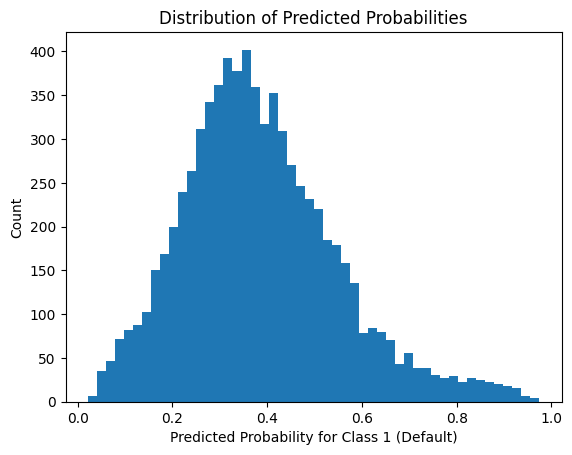

In [73]:
plt.hist(y_scores, bins=50)
plt.xlabel('Predicted Probability for Class 1 (Default)')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.show()

In [78]:
# Train-test split (again)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [79]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE, class balance:")
print(y_resampled.value_counts())

After SMOTE, class balance:
target
0.0    28472
1.0    28472
Name: count, dtype: int64


In [80]:
# LightGBM baseline
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_resampled, y_resampled)
y_pred_lgb = lgb_clf.predict(X_test)
print("\nLightGBM Report:")
print(classification_report(y_test, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_test, lgb_clf.predict_proba(X_test)[:,1]))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28472, number of negative: 28472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3297
[LightGBM] [Info] Number of data points in the train set: 56944, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      7119
         1.0       0.59      0.07      0.13       225

    accuracy                           0.97      7344
   macro avg       0.78      0.53      0.56      7344
weighted avg       0.96      0.97      0.96      7344

ROC AUC: 0.7430388163131525


In [81]:
# CatBoost baseline
cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_resampled, y_resampled)
y_pred_cat = cat_clf.predict(X_test)
print("\nCatBoost Report:")
print(classification_report(y_test, y_pred_cat))
print("ROC AUC:", roc_auc_score(y_test, cat_clf.predict_proba(X_test)[:,1]))


CatBoost Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      7119
         1.0       0.52      0.05      0.10       225

    accuracy                           0.97      7344
   macro avg       0.75      0.53      0.54      7344
weighted avg       0.96      0.97      0.96      7344

ROC AUC: 0.7268873593357369
